# Housing Prices Prediction
The dataset was taken from Kaggle: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview). I will not be submitting my results to Kaggle, and will be using the data [for academic research and education](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/rules#:~:text=A.%20Data,and%20these%20Rules.).

I have also followed a [youtube tutorial](https://www.youtube.com/watch?v=Wqmtf9SA_kk) as well as my own research of the respective libraries used in order to conduct this notebook.

In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [26]:
data = pd.read_csv("house-prices-data/train.csv")

## Data Exploration / Cleanup
In this section, we have to analyze the data for any missing values and identify our target values.

In [27]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Dropping ID, since it's deemed unnecessary. 

In [29]:
data.drop(['Id'], axis=1, inplace=True)

### Converting Non Numerical Data
There are two ways to convert and add non numerical data into numerical data. 

The first method is Dummy Variable Encoding, where you get each non numerical string and turn them into seperate columns with 1s or 0s depending on if the row had that string or not. 

The second method is Label Encoding, where you convert the value into a corresponding number

However for our use case, I will be creating a custom dictionary and function to correlate specific non numerical symbols into corresponding numbers in order to be consistent between different files.

First we need to process the txt file with the information for each column in order to handle this automatically

In [30]:
import os

data_desc = open(os.getcwd() + "\house-prices-data\data_description.txt", "r")
data_dict = {}

current_column = ""
for line in data_desc.readlines():
    line = line.replace("\n", "").replace("\t\t", "")

    if line == "":
        continue

    first = line[:1]

    if first.strip() != '':
        current_column = line.split(":")[0]
        data_dict[current_column] = []
    else:
        value = line.split("\t")[0].strip()
        if value != "":
            data_dict[current_column].append(value)
        
print(data_dict)

{'MSSubClass': ['20', '30', '40', '45', '50', '60', '70', '75', '80', '85', '90', '120', '150', '160', '180', '190'], 'MSZoning': ['A', 'C', 'FV', 'I', 'RH', 'RL', 'RP', 'RM'], 'LotFrontage': [], 'LotArea': [], 'Street': ['Grvl', 'Pave'], 'Alley': ['Grvl', 'Pave', 'NA'], 'LotShape': ['Reg', 'IR1', 'IR2', 'IR3'], 'LandContour': ['Lvl', 'Bnk', 'HLS', 'Low'], 'Utilities': ['AllPub', 'NoSewr', 'NoSeWa', 'ELO'], 'LotConfig': ['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'], 'LandSlope': ['Gtl', 'Mod', 'Sev'], 'Neighborhood': ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'Names', 'NoRidge', 'NPkVill', 'NridgHt', 'NWAmes', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'], 'Condition1': ['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'], 'Condition2': ['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'], 'BldgType': ['1Fam', '2FmCo

Then we assign each column's string to the value's index inside the dictionary

In [31]:
import math

def replace_non_number(dataset):
    for column in dataset.columns:
        if (not pd.api.types.is_numeric_dtype(dataset[column])):
            arr = []
            for val in dataset[column]:
                if column == "MSZoning":
                    if val == "C (all)": val = "C"
                if column == "Neighborhood":
                    if val == "NAmes": val = "Names"
                if column == "BldgType":
                    if val == "2fmCon": val = "2FmCon"
                    if val == "Duplex": val = "Duplx"
                    if val == "Twnhs": val = "TwnhsI"
                if column == "Exterior2nd":
                    if val == "Brk Cmn": val = "BrkComm"
                    if val == "Wd Shng": val = "WdShing"
                    if val == "CmentBd": val = "CemntBd"

                if val in data_dict[column]:
                    arr.append(data_dict[column].index(val))
                else:
                    #this is for nan/empty values
                    if type(val) is not str:
                        if math.isnan(val):
                            arr.append(-1)

            dataset[column] = arr
    return dataset

data = replace_non_number(data)
print(data)

      MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0             60         5         65.0     8450       1     -1         0   
1             20         5         80.0     9600       1     -1         0   
2             60         5         68.0    11250       1     -1         1   
3             70         5         60.0     9550       1     -1         1   
4             60         5         84.0    14260       1     -1         1   
...          ...       ...          ...      ...     ...    ...       ...   
1455          60         5         62.0     7917       1     -1         0   
1456          20         5         85.0    13175       1     -1         0   
1457          70         5         66.0     9042       1     -1         0   
1458          20         5         68.0     9717       1     -1         0   
1459          20         5         75.0     9937       1     -1         0   

      LandContour  Utilities  LotConfig  ...  PoolArea  PoolQC  Fence  \
0 

In [32]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,5,65.0,8450,1,-1,0,0,0,0,...,0,-1,-1,-1,0,2,2008,0,0,208500
1,20,5,80.0,9600,1,-1,0,0,0,3,...,0,-1,-1,-1,0,5,2007,0,0,181500
2,60,5,68.0,11250,1,-1,1,0,0,0,...,0,-1,-1,-1,0,9,2008,0,0,223500
3,70,5,60.0,9550,1,-1,1,0,0,1,...,0,-1,-1,-1,0,2,2006,0,1,140000
4,60,5,84.0,14260,1,-1,1,0,0,3,...,0,-1,-1,-1,0,12,2008,0,0,250000


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   Alley          1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   int64  
 12  Condition1     1460 non-null   int64  
 13  Condition2     1460 non-null   int64  
 14  BldgType       1460 non-null   int64  
 15  HouseStyle     1460 non-null   int64  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

**There are still missing values in certain columns**.

### Removing rows with missing values
We can't use rows with missing values, so we have to remove them.

In [34]:
data.dropna(inplace=True)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1121 non-null   int64  
 1   MSZoning       1121 non-null   int64  
 2   LotFrontage    1121 non-null   float64
 3   LotArea        1121 non-null   int64  
 4   Street         1121 non-null   int64  
 5   Alley          1121 non-null   int64  
 6   LotShape       1121 non-null   int64  
 7   LandContour    1121 non-null   int64  
 8   Utilities      1121 non-null   int64  
 9   LotConfig      1121 non-null   int64  
 10  LandSlope      1121 non-null   int64  
 11  Neighborhood   1121 non-null   int64  
 12  Condition1     1121 non-null   int64  
 13  Condition2     1121 non-null   int64  
 14  BldgType       1121 non-null   int64  
 15  HouseStyle     1121 non-null   int64  
 16  OverallQual    1121 non-null   int64  
 17  OverallCond    1121 non-null   int64  
 18  YearBuil

## Data Analysis for Correlation 
We must check if our dependent variable has actual correlation to the independent variables.

Let's check for correlations in our data to our target value higher than 0.6 using pandas.

The correlation for the negative percentages can be explained due to how the rankings went from Excellent to Bad but the numbers went from 1 to 5, so this may be why they are instead in the negative. This still shows strong correlation with the values either way.

In [36]:
high_corr = []

for col in range(len(data.columns)):
    corr = data.corr()["SalePrice"][col]
    if corr >= 0.6:
        print(data.columns[col], ":", str(round(corr * 10000) / 100) + "%", "correlation to SalePrice")
        high_corr.append(data.columns[col])

    if corr <= -0.6:
        print(data.columns[col], ":", str(round(corr * 10000) / 100) + "%", "correlation to SalePrice")
        high_corr.append(data.columns[col])

OverallQual : 79.79% correlation to SalePrice
ExterQual : -69.96% correlation to SalePrice


TotalBsmtSF : 61.56% correlation to SalePrice
1stFlrSF : 60.8% correlation to SalePrice
GrLivArea : 70.52% correlation to SalePrice
KitchenQual : -67.07% correlation to SalePrice
GarageCars : 64.7% correlation to SalePrice
GarageArea : 61.93% correlation to SalePrice
SalePrice : 100.0% correlation to SalePrice


We will remove points with lower correlation for the prediction

In [37]:
def remove_if_not_in_list(dataset, list):
    for col in dataset.columns:
        if col not in list:
            dataset = dataset.drop([col], axis=1)
    return dataset

data = remove_if_not_in_list(data, high_corr)

Let's use a heatmap to visualize this data

<Axes: >

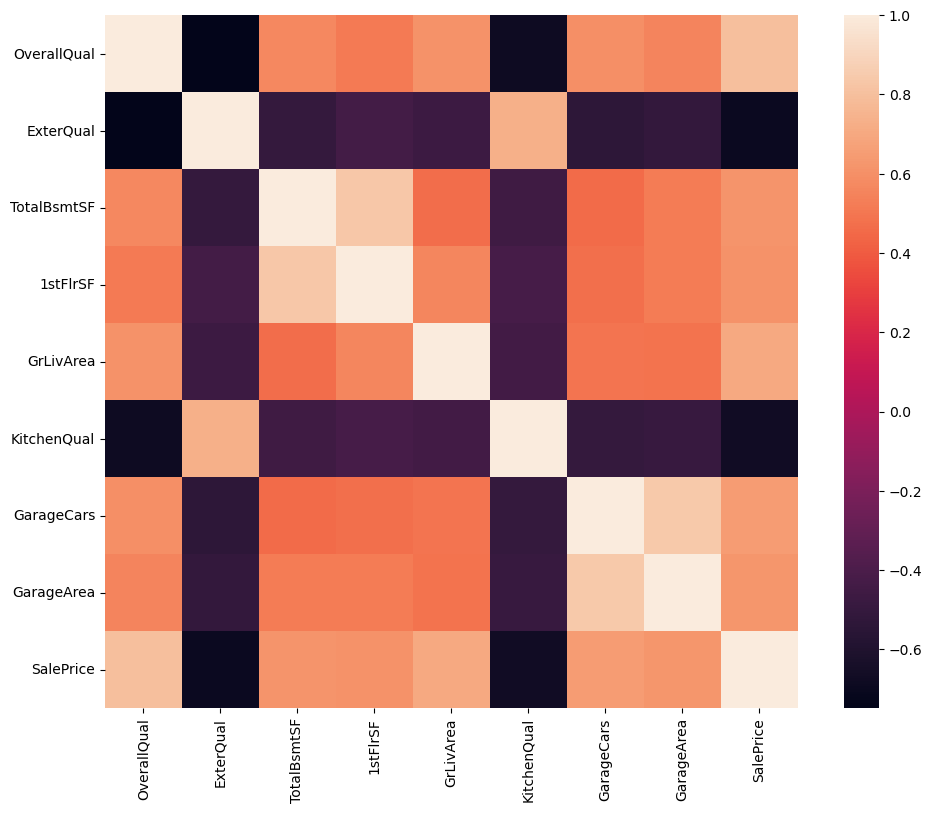

In [38]:
plt.figure(figsize=(12, 9))
sns.heatmap(data.corr(), square=True)

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

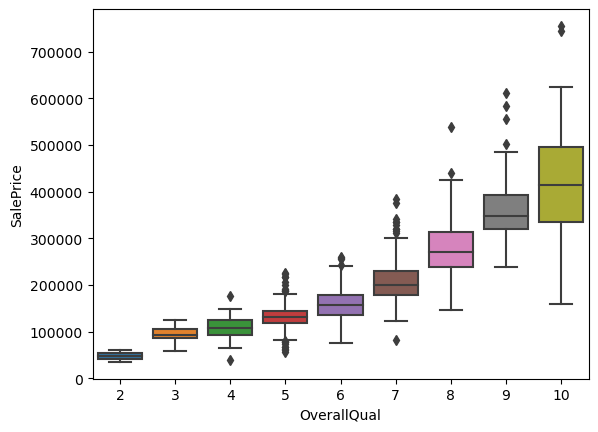

In [39]:
sns.boxplot(x="OverallQual", y="SalePrice", data=data)

## Machine Learning Models

### Selecting Independent and Dependent Variables
We have identified our target value to be SalePrice. This will be the value we will be attempting to reach.
X : Data without target value - Independent Variable
Y : Target Value - Dependent Variable

In [40]:
X = data.drop(['SalePrice'], axis=1)
Y = data['SalePrice']

Then we split them into training and testing sets

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Linear Regression 

In [43]:
from sklearn.linear_model import LinearRegression

lg = LinearRegression()

lg.fit(X_train, Y_train)

LinearRegression()

Confidence Score

In [44]:
print(str(round(lg.score(X_test, Y_test) * 10000) / 100) + "% : Confidence")

54.4% : Confidence


Comparing Actual Data to Predicted Data

In [45]:
a = {'A': Y_test, 'B': lg.predict(X_test)}
pd.DataFrame(a)

,A,B
1416,122500,168904.788779
501,226700,222174.324236
926,285000,304937.297999
1458,142125,129654.883289
107,115000,88629.648445
...,...,...
1022,87000,114490.444933
713,129000,105561.924647
889,149500,185534.685040
829,147400,178491.144198


### Random Forest Regression

In [46]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, Y_train)

RandomForestRegressor()

Confidence Score

In [47]:
print(str(round(forest.score(X_test, Y_test) * 10000) / 100) + "% : Confidence")

82.23% : Confidence


Comparing Actual Data to Predicted Data

In [48]:
b = {'A': Y_test, 'B': forest.predict(X_test)}
pd.DataFrame(b)

,A,B
1416,122500,125169.21
501,226700,213599.00
926,285000,315441.82
1458,142125,118379.50
107,115000,111283.00
...,...,...
1022,87000,119449.00
713,129000,100671.97
889,149500,182239.00
829,147400,148983.43


## Using New Data
We will now be importing our stress test / experimental data in order to use them with our machine learning models. We will be doing the same process as before.

Import Data -> Convert Non-Numerical Data to Numerical -> Removing Rows with missing Values

In [49]:
#import data
stress_data = pd.read_csv("house-prices-data/test.csv")

#change non-numerical data to numerical
stress_data = replace_non_number(stress_data)

#remove missing rows
stress_data.dropna(inplace=True)

#save and drop Id column
id_column = stress_data["Id"]
stress_data.drop(['Id'], axis=1, inplace=True)

#removing columns
stress_data = remove_if_not_in_list(stress_data, high_corr)

#scaling the data
stress_data = sc.fit_transform(stress_data)

Creating the predictions (There isn't a proper comparison point, and is just mostly for experimentation)

In [50]:
c = {'Id': id_column, 'Logistic Regression': lg.predict(stress_data), 'Random Forest Regression': forest.predict(stress_data)}
pd.DataFrame(c)

,Id,Logistic Regression,Random Forest Regression
0,1461,118162.015962,133727.54
1,1462,174940.379444,161629.54
2,1463,157510.049416,138290.00
3,1464,185212.869155,187128.00
4,1465,228587.264333,220061.90
...,...,...,...
1451,2912,140424.909898,138767.12
1452,2913,86045.645475,89010.44
1455,2916,86045.645475,89010.44
1456,2917,150111.278055,152862.14
